In [3]:
# %pip install pandas pymongo  # ← exécutez cette ligne manuellement si la lib manque

Note: you may need to restart the kernel to use updated packages.


In [70]:
# %pip install xgboost  # ← exécutez cette ligne manuellement si la lib manque


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.3/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.7/99.8 MB 4.7 MB/s eta 0:00:21
   ---------------------------------------- 1.2/99.8 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.5/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.8/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.8/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.8/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.9/99.8 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 1.9/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 2.0/99.8 MB 3.9 MB/s eta 0:00:26
    --------

In [92]:
# %pip install imbalanced-learn  # ← exécutez cette ligne manuellement si la lib manque

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 445.2 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 563.7 kB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [94]:


import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler

from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import linear_model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [74]:
import pandas as pd
from pymongo import MongoClient

def import_mongodb_to_dataframe(db_name, collection_name):
    # Connect to MongoDB
    client = MongoClient('localhost', 27017)  # Assuming MongoDB is running on localhost

#Access the specified database
    db = client[db_name]

#Access the specified collection
    collection = db[collection_name]

#Query all documents from the collection
    cursor = collection.find({})

#Convert documents to a list of dictionaries
    data = list(cursor)

#Close the MongoDB connection
    client.close()

#Convert list of dictionaries to pandas DataFrame
    df = pd.DataFrame(data)

    return df

#Specify the database name and collection name
db_name = 'CreditCardFraud'
collection_name = 'transactions'

#Call the function to import data from MongoDB to pandas DataFrame
df = import_mongodb_to_dataframe(db_name, collection_name)

#Now you can work with the DataFrame (df)
print(df.head())  # Print the first few rows of the DataFrame

                        _id     Time        V1        V2       V3        V4  \
0  662621a7970df173efed9597 0.000000 -1.359807 -0.072781 2.536347  1.378155   
1  662621a7970df173efed9598 0.000000  1.191857  0.266151 0.166480  0.448154   
2  662621a7970df173efed9599 1.000000 -1.358354 -1.340163 1.773209  0.379780   
3  662621a7970df173efed959a 1.000000 -0.966272 -0.185226 1.792993 -0.863291   
4  662621a7970df173efed959b 2.000000 -1.158233  0.877737 1.548718  0.403034   

         V5        V6        V7        V8        V9       V10       V11  \
0 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600   
1  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727   
2 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501   
3 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487   
4 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843   

        V12       V13       V14       V15       V16       V17       V18  \

In [63]:
column_list = (list(df.columns))
print(column_list)

['_id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [75]:
import pandas as pd

# Assume df is your DataFrame
df.drop('_id', axis=1, inplace=True)

In [76]:
#observe the different feature type present in the data

print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape of the data frame: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [65]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


In [77]:
#calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


In [78]:
#the percentage of normal and fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

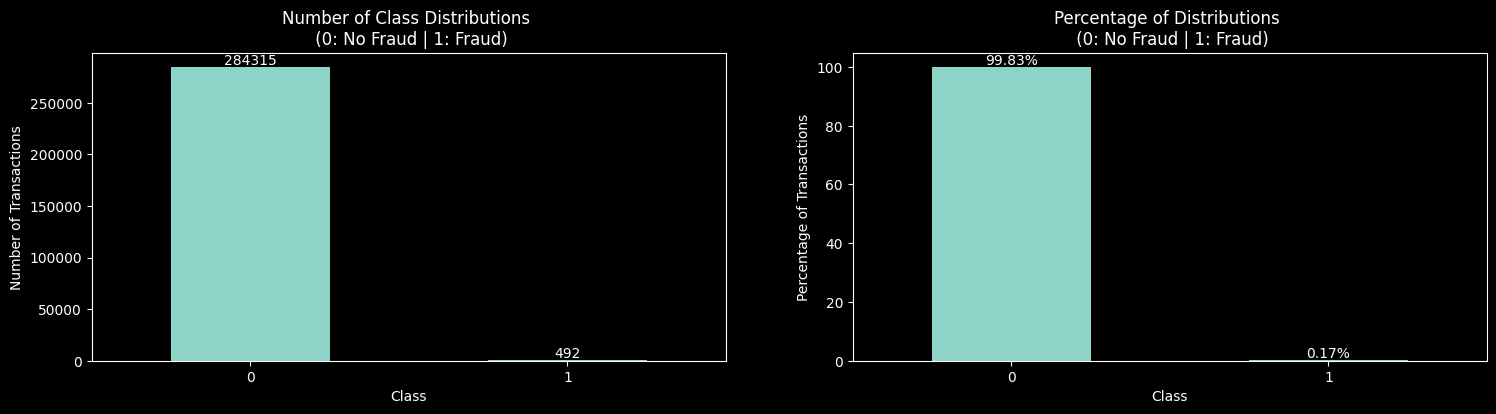

In [68]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='r')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

In [29]:
import pandas as pd


# Option 1: Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Option 2: Attempt to convert all columns to numeric, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()

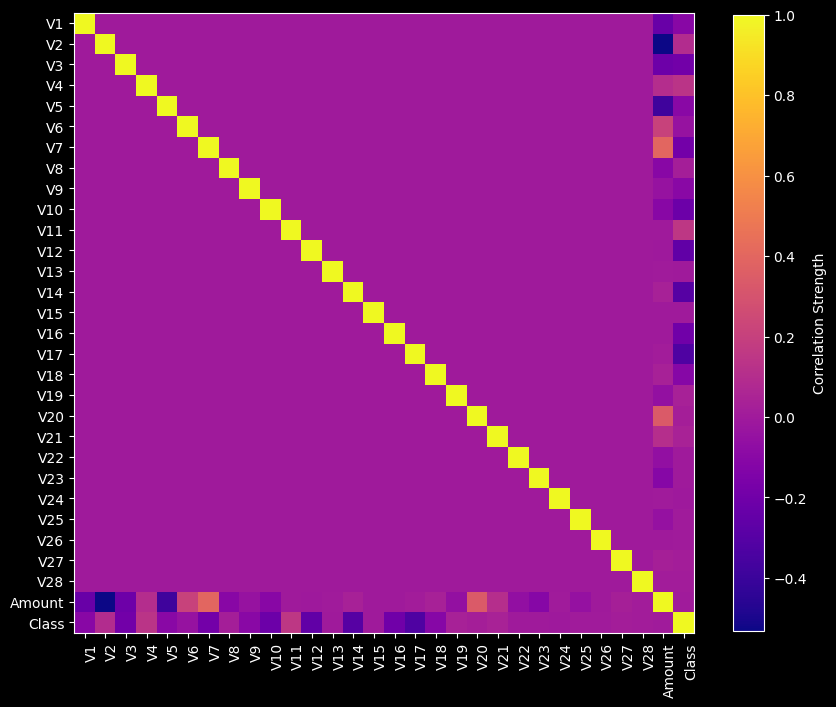

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# defining a function to create correlation matrix plot
def corrplot(data):
     with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()

# plotting the correlation matrix using the defined function
corrplot(df)

Plotting the distributions of all the features

In [142]:

df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [143]:
# y= #class variable
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [144]:

# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [81]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [145]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()

Saved X_test & y_test


In [146]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [147]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


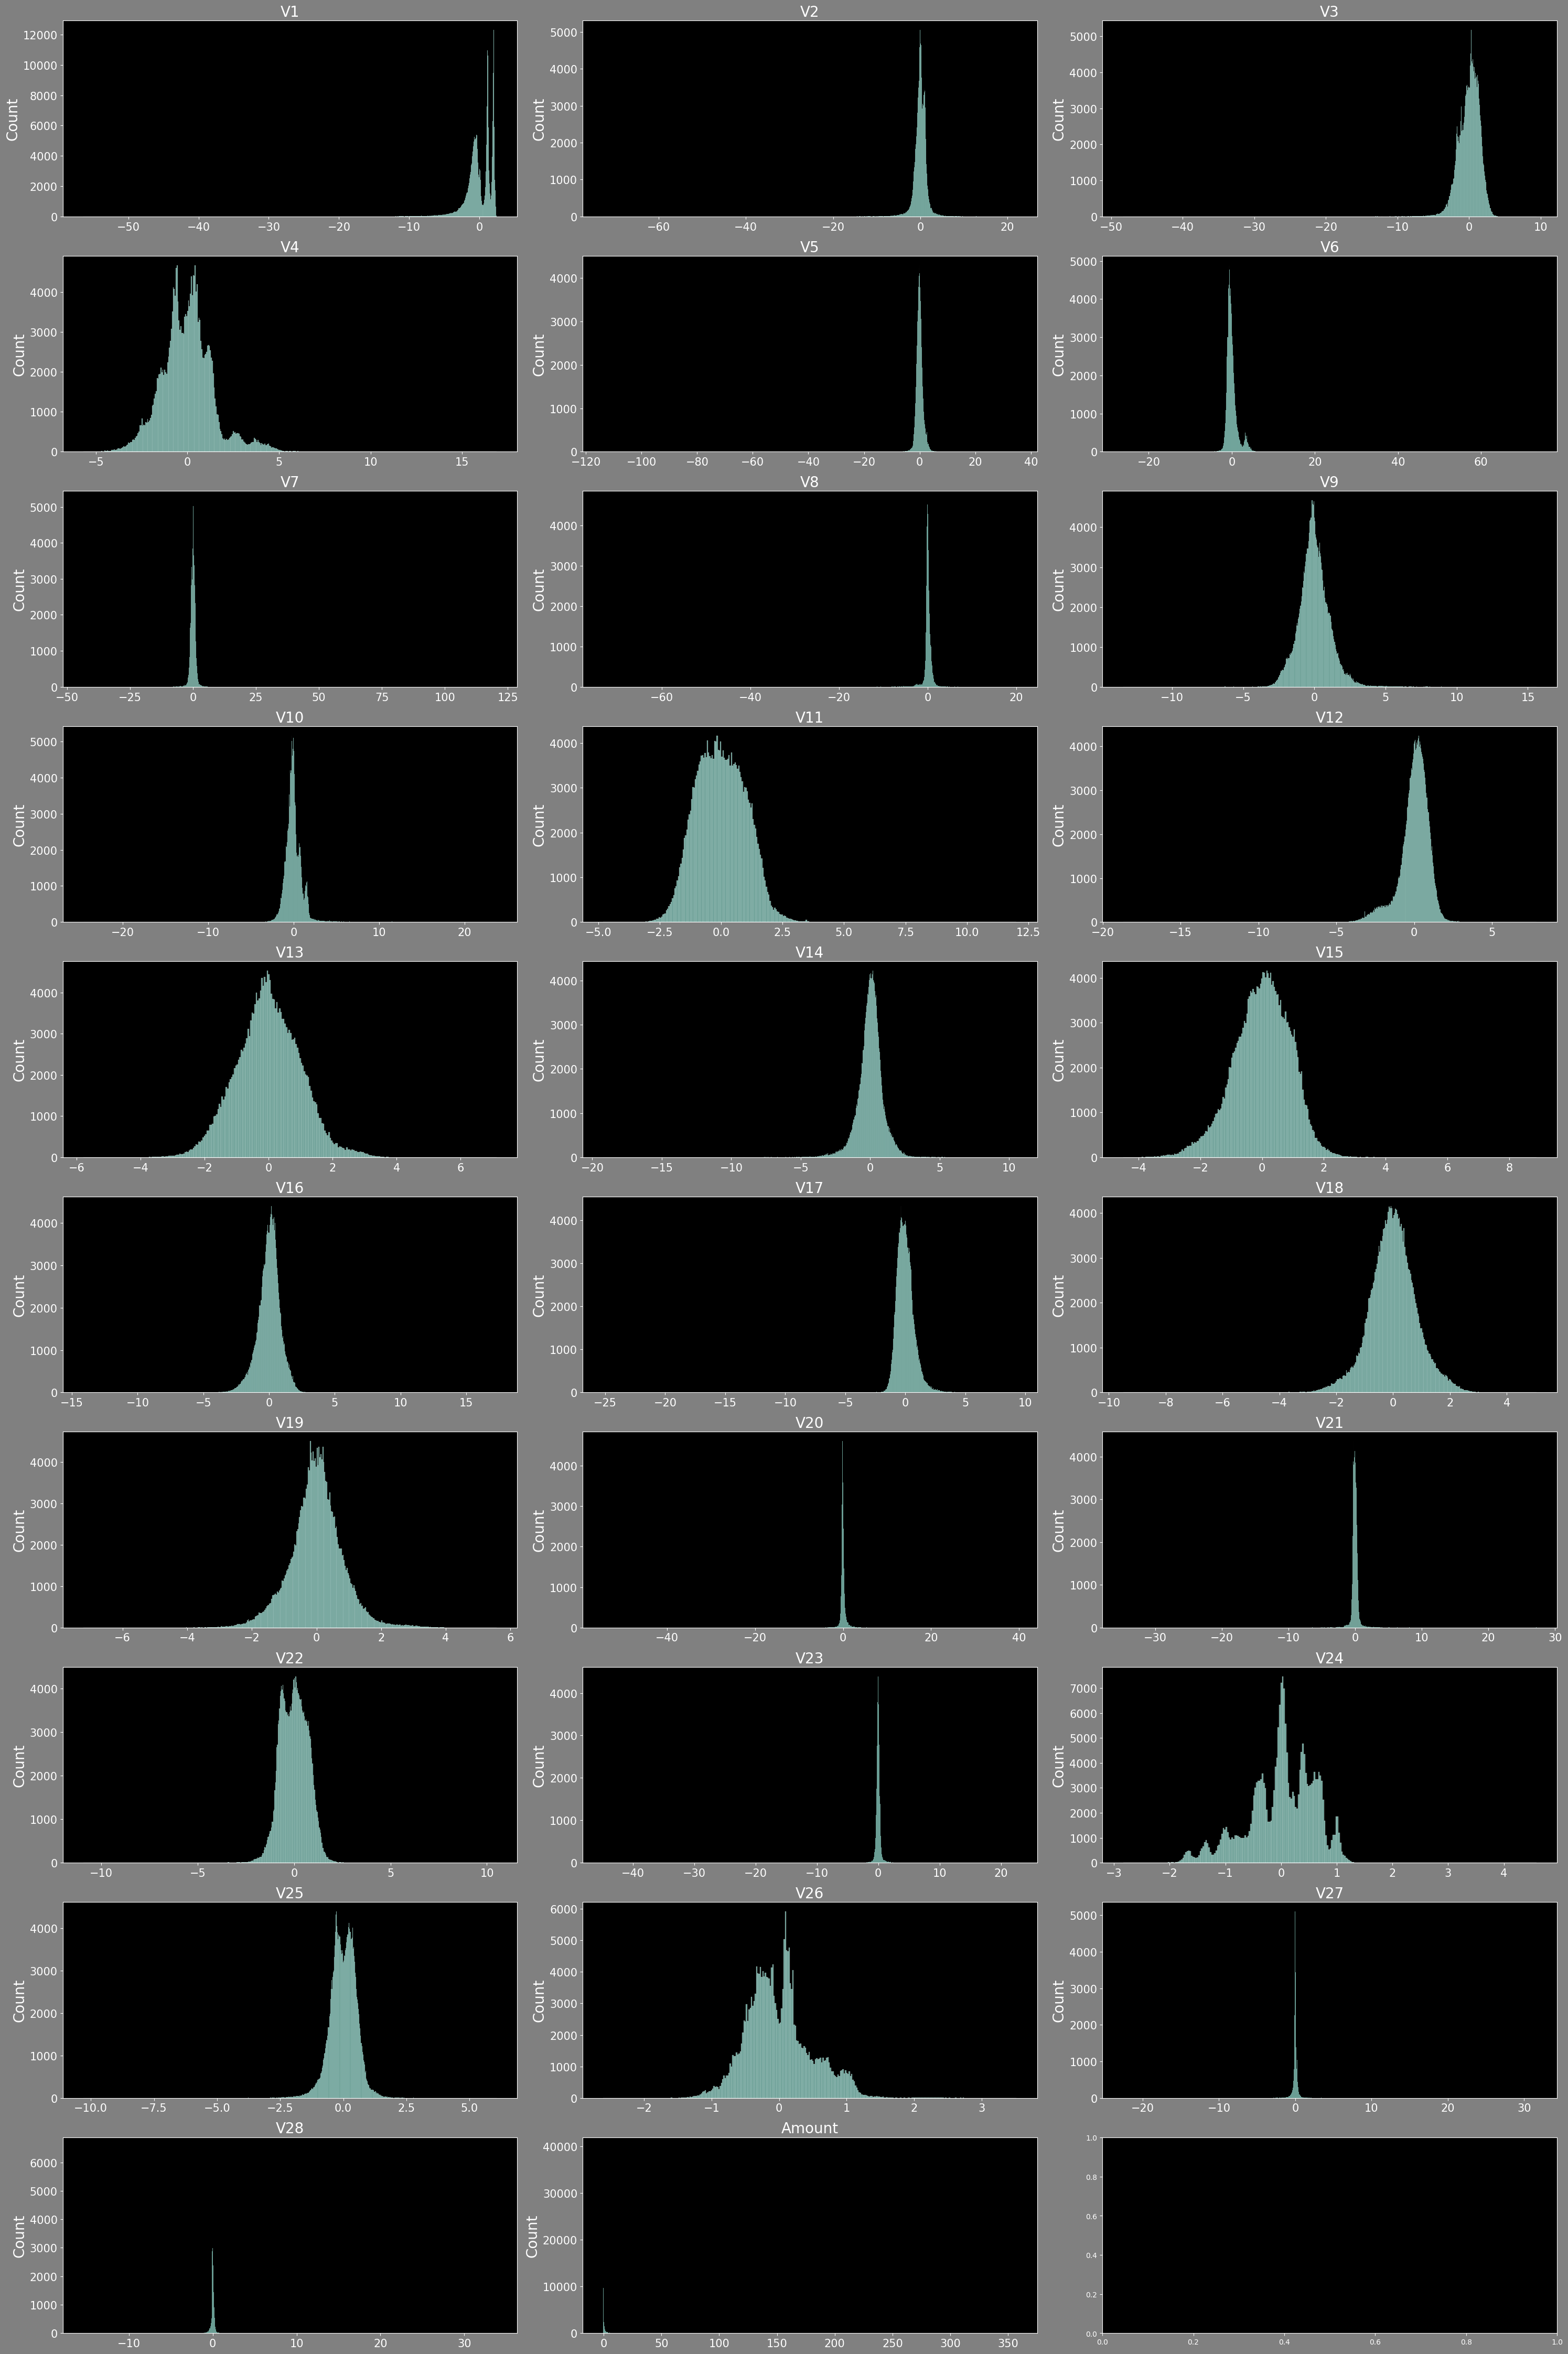

In [148]:

var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='grey')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

In [85]:
# Lets check the skewness of the features


var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
Time,-0.037394
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485


In [149]:
# Filtering the features which has skewness less than -1 and greater than +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [150]:

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [151]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


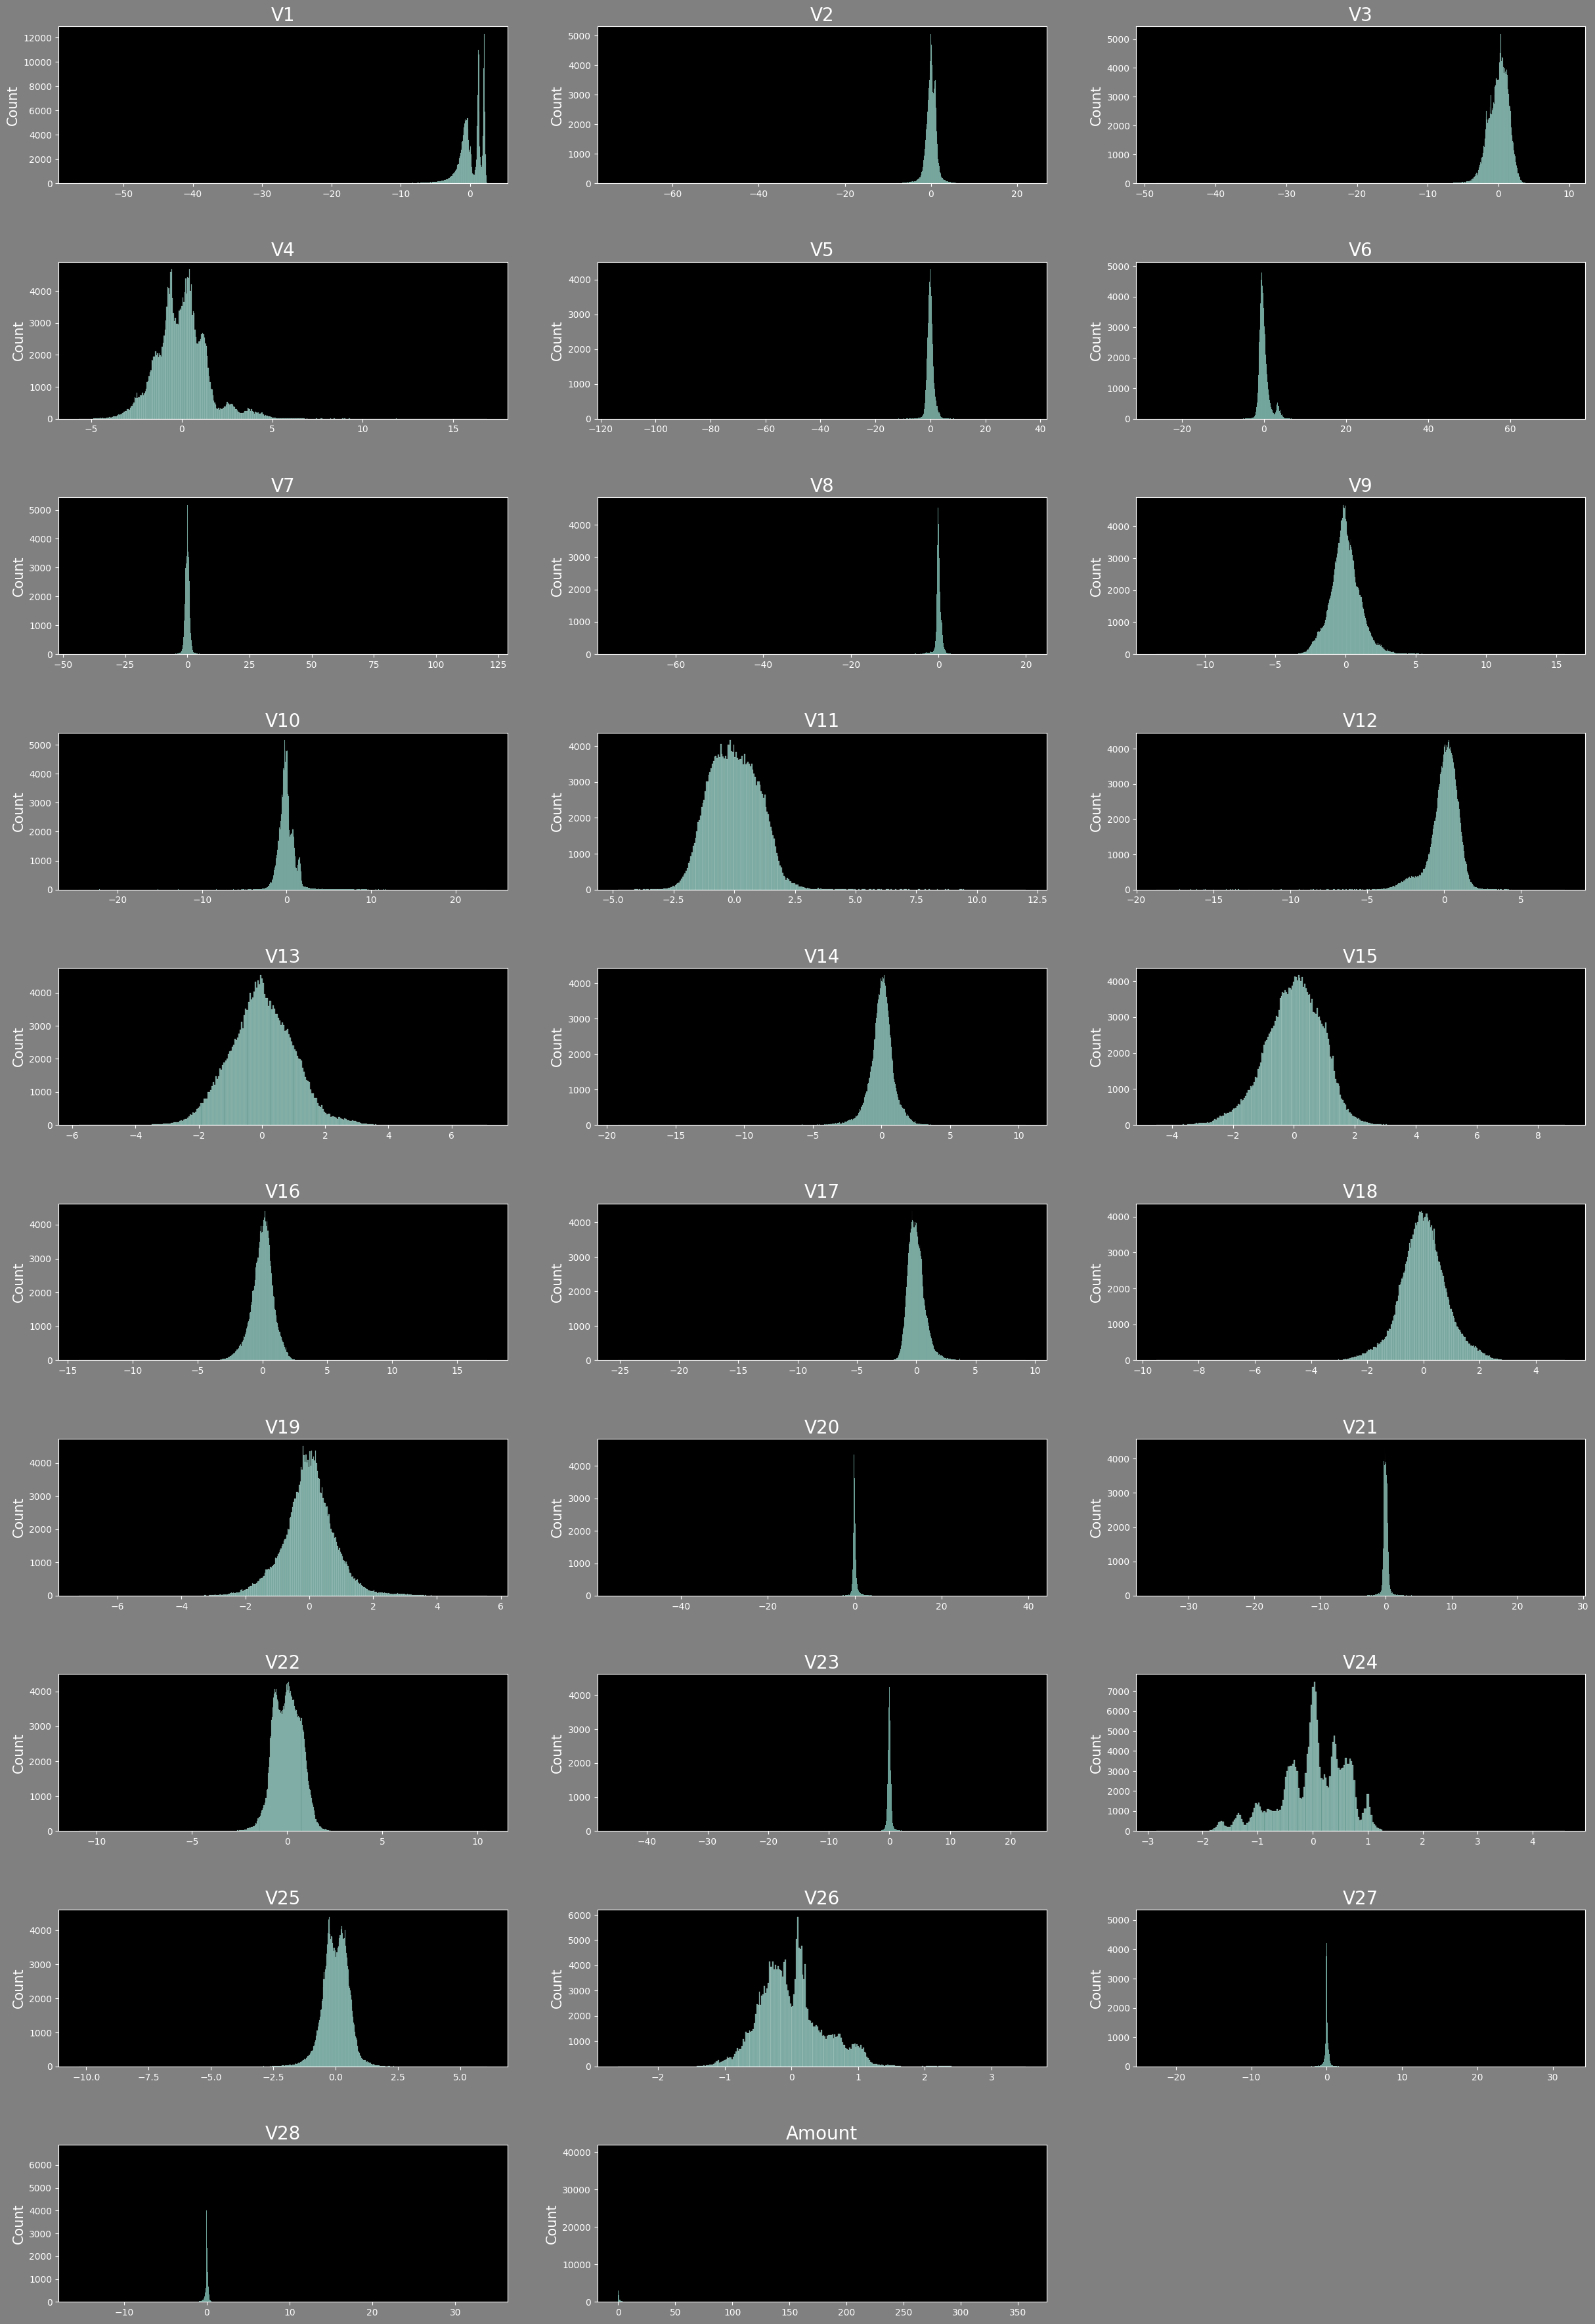

In [57]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='grey') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

In [152]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0   0.998271
1   0.001729
Name: count, dtype: float64

Random Oversampling

In [153]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [154]:
from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

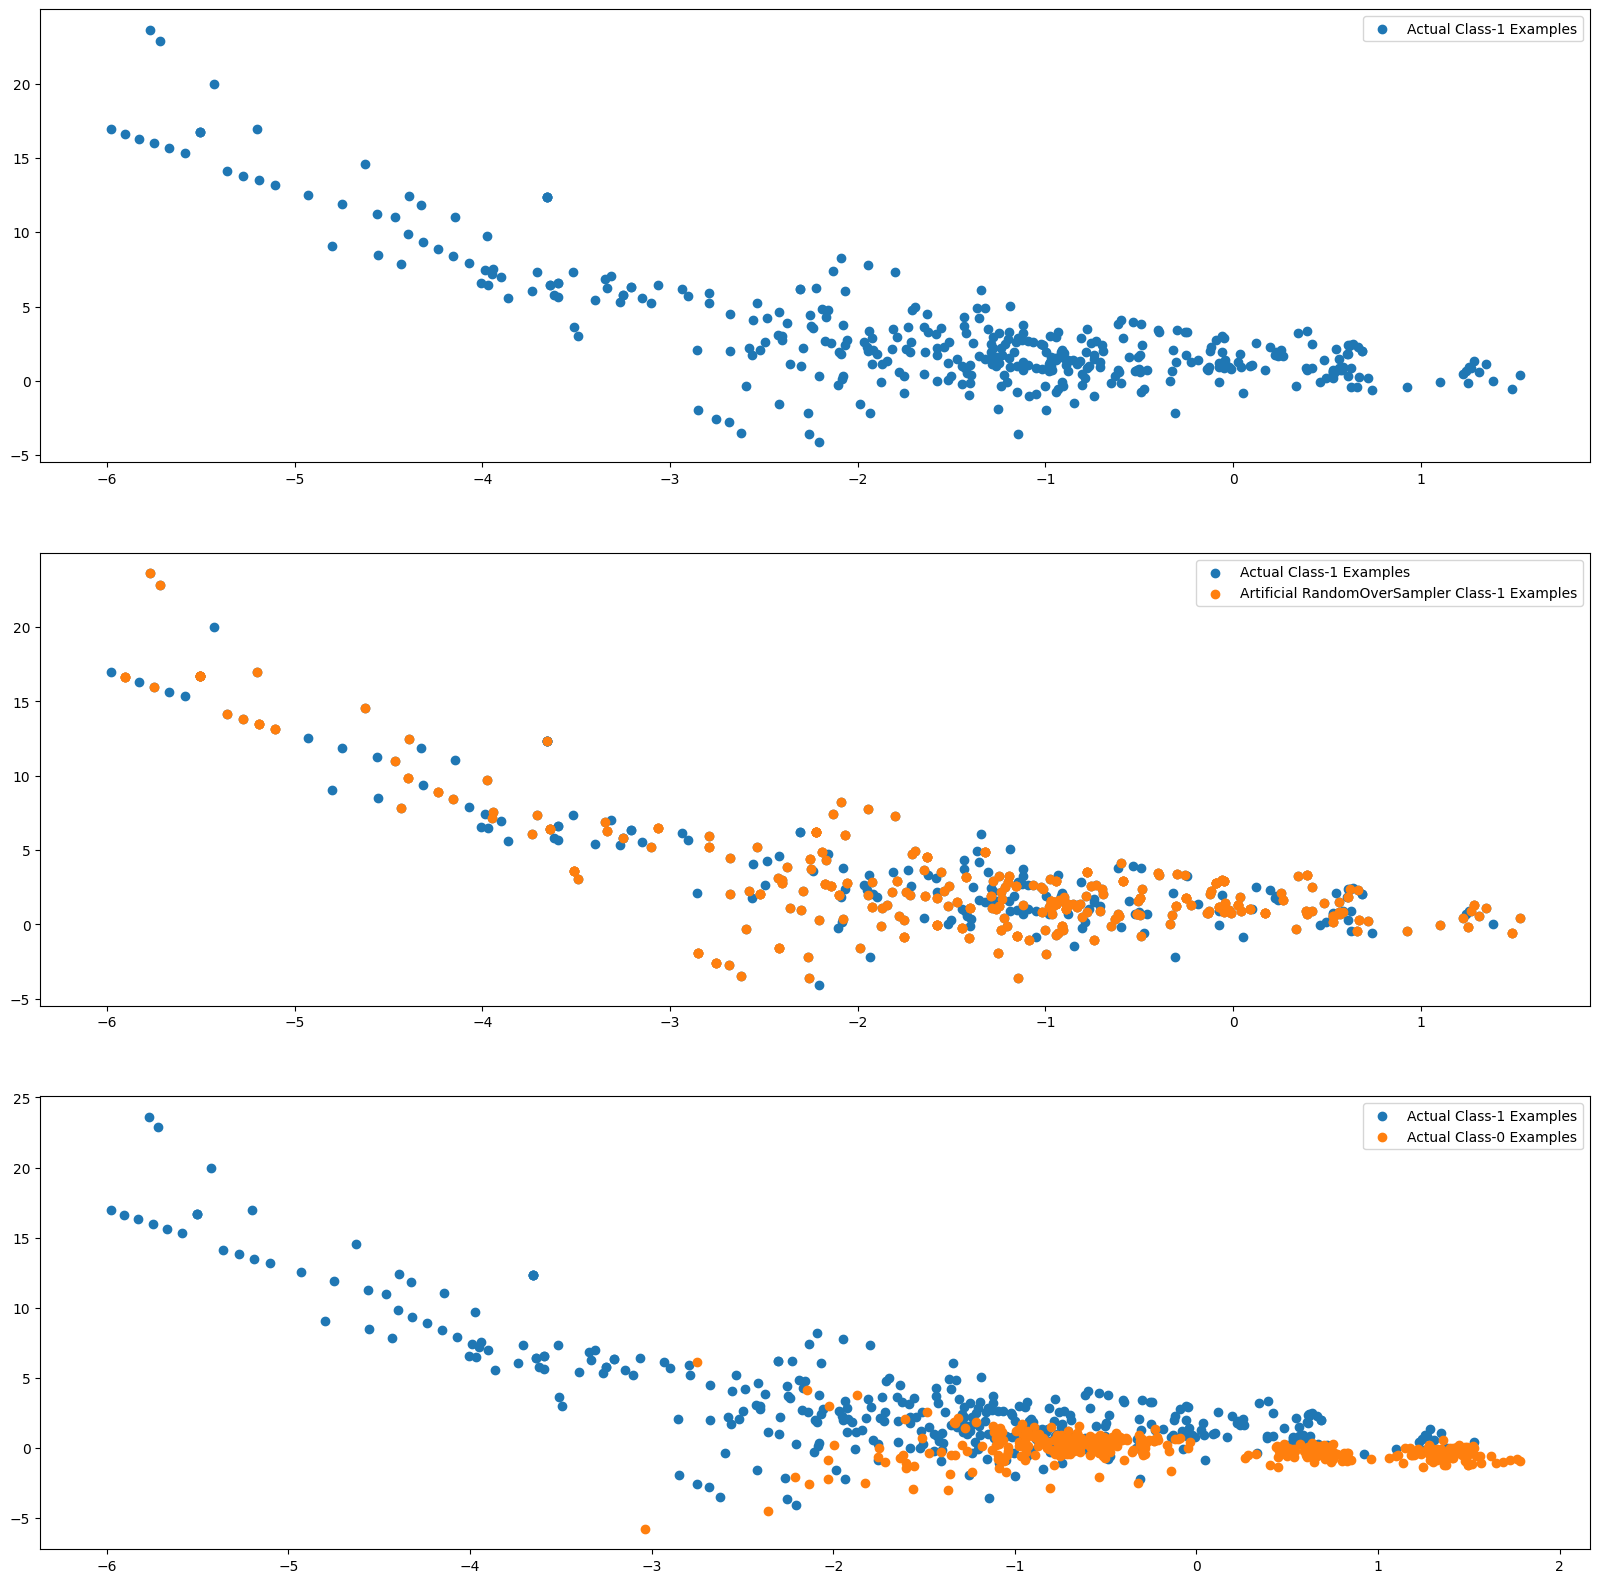

In [155]:
import warnings
warnings.filterwarnings("ignore")


X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [113]:
print(y_ros_train_pt.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


1. Logistic Regression


======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 0.9847750663757324 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.0089623928070068 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 0.9469749927520752 seconds
ROC-AUC Score for val data = 0.9884596673443647
Mean precision val score: 0.971995125195427
Mean recall val score: 0.9294177647053652
Mean f1 val score: 0.9502289914447828
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 0.9520308971405029 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938

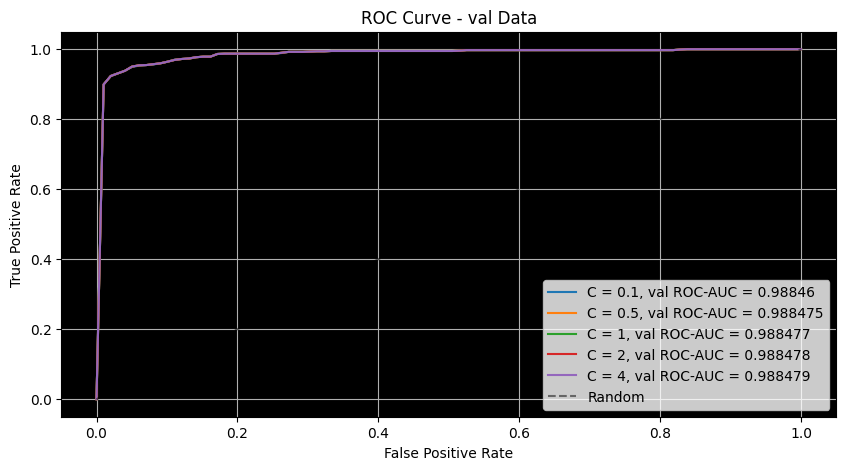

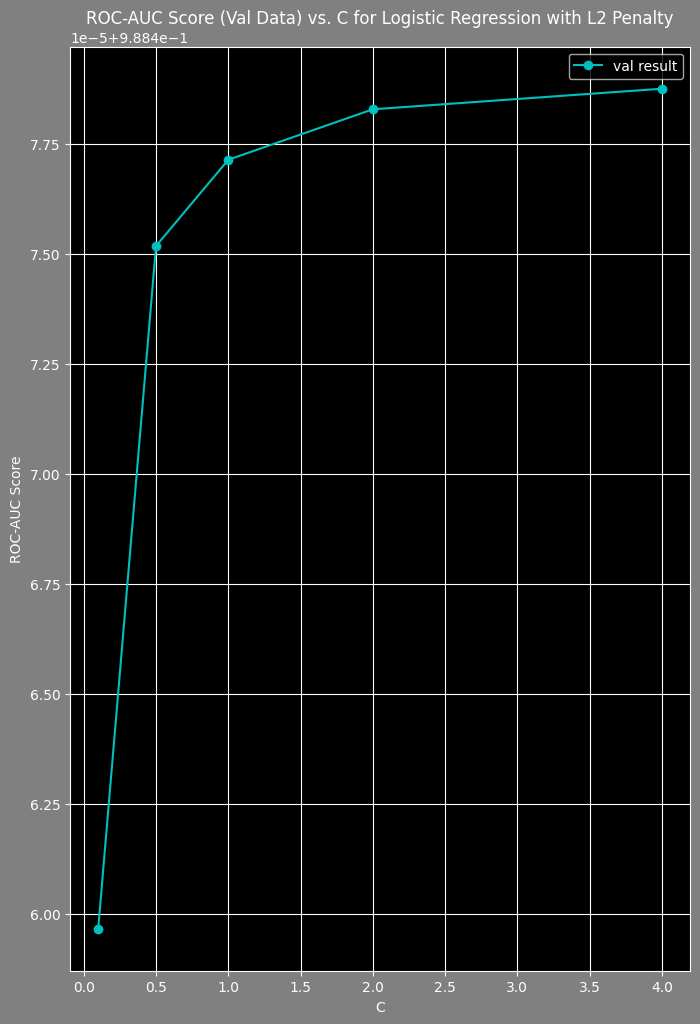

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time


print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='white')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)


    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))



print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='grey')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()


In [157]:

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


Mean ROC-AUC scores for val data for all values of C: 
 [0.9884596673443647, 0.9884751736875929, 0.9884771319758253, 0.9884782784761702, 0.9884787455195051]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9884787455195051
Mean precision val score for best C 0.9719371184117677
Mean recall val score for best C 0.9294177647053652
Mean f1 val score for best C 0.950201240931848


Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 18.21 seconds
Best ROC AUC score:  0.9884840531068964
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [131]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9886202412385212
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9887660779264342
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9887803817229575
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9887819235342552
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9887830537976825
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9887836385586697

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 9.019543670399717e-05
{'C

Random Forest

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 17.193726301193237 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 16.47432851791382 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 18.398489236831665 seconds
ROC-AUC Score for val data = 0.9999868103459647
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 88.51810026168823 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 3790

KeyboardInterrupt: 

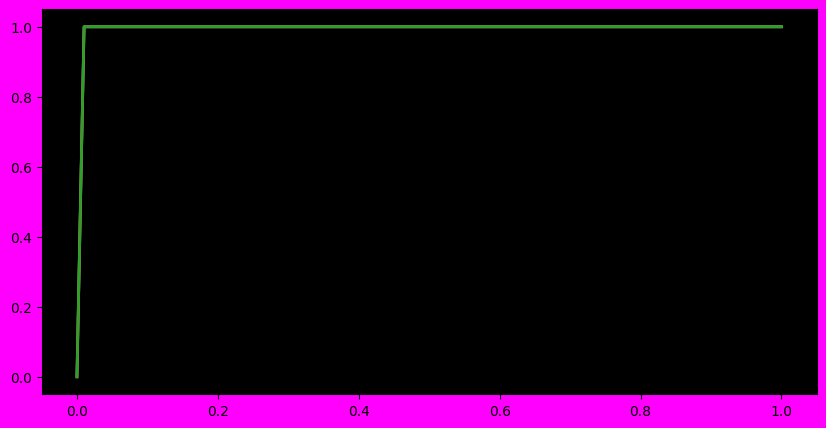

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier


print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='white')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))

In [ ]:
# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: 

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

XGBoost

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb


print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='white')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42, eval_metric='logloss'
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

In [ ]:
# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])

In [134]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1,0.2],
    'max_depth': [3, 5],
    'subsample': [0.5],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Time taken: 22.24 seconds
Best ROC AUC score:  0.9999839078809775
Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5}


In [135]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9996837953382688
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.999955598293357
{'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5} 0.9999121480410871
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5} 0.9999839078809775

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
3 {'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5}
4 {'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5}

Standard deviation of test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 3.3571174356958736e-05
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 2.367423313863281e-05
{'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5} 4.3558750393503186e-05
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5} 1.061058399713766e-05


In [161]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.000000
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.850000
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.070000
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.990000
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.500000


In [162]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [163]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [164]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.014079
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.142897
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.761228
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.295791
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.288610


In [165]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [166]:
from sklearn.metrics import f1_score, precision_score, recall_score


# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
precision = precision_score(y_test_saved_ros, y_pred)
recall = recall_score(y_test_saved_ros, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", precision)
print("LogisticRegression Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524862
LogisticRegression F1-Score on Test Set = 0.932017141909525
LogisticRegression Precision on Test Set = 0.925193643972344
LogisticRegression Recall on Test Set = 0.9389420371412492
Time taken: 2.18 seconds


In [160]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
precision = precision_score(y_test_saved_ros, y_pred)
recall = recall_score(y_test_saved_ros, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", precision)
print("XGBOOST Classifier Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

ValueError: Feature shape mismatch, expected: 29, got 30

In [167]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
precision = precision_score(y_test_saved_ros, y_pred)
recall = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", precision)
print("Random Forest Classifier Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

Random Forest Classifier ROC-AUC Score on Test Set = 0.9659930304515326
Random Forest Classifier F1-Score on Test Set = 0.79159008573523
Random Forest Classifier Precision on Test Set = 0.9997853098247591
Random Forest Classifier Recall on Test Set = 0.6551596792346651
Time taken: 1783.24 seconds


Based on ROC-AUC Scores-

KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.
LogisticRegression score decreased. But, the best model is XGBClassifier
Based on F1 Scores-

LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.
RandomForestClassifier score decreased. But, the best model is XGBClassifier

In [168]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [169]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

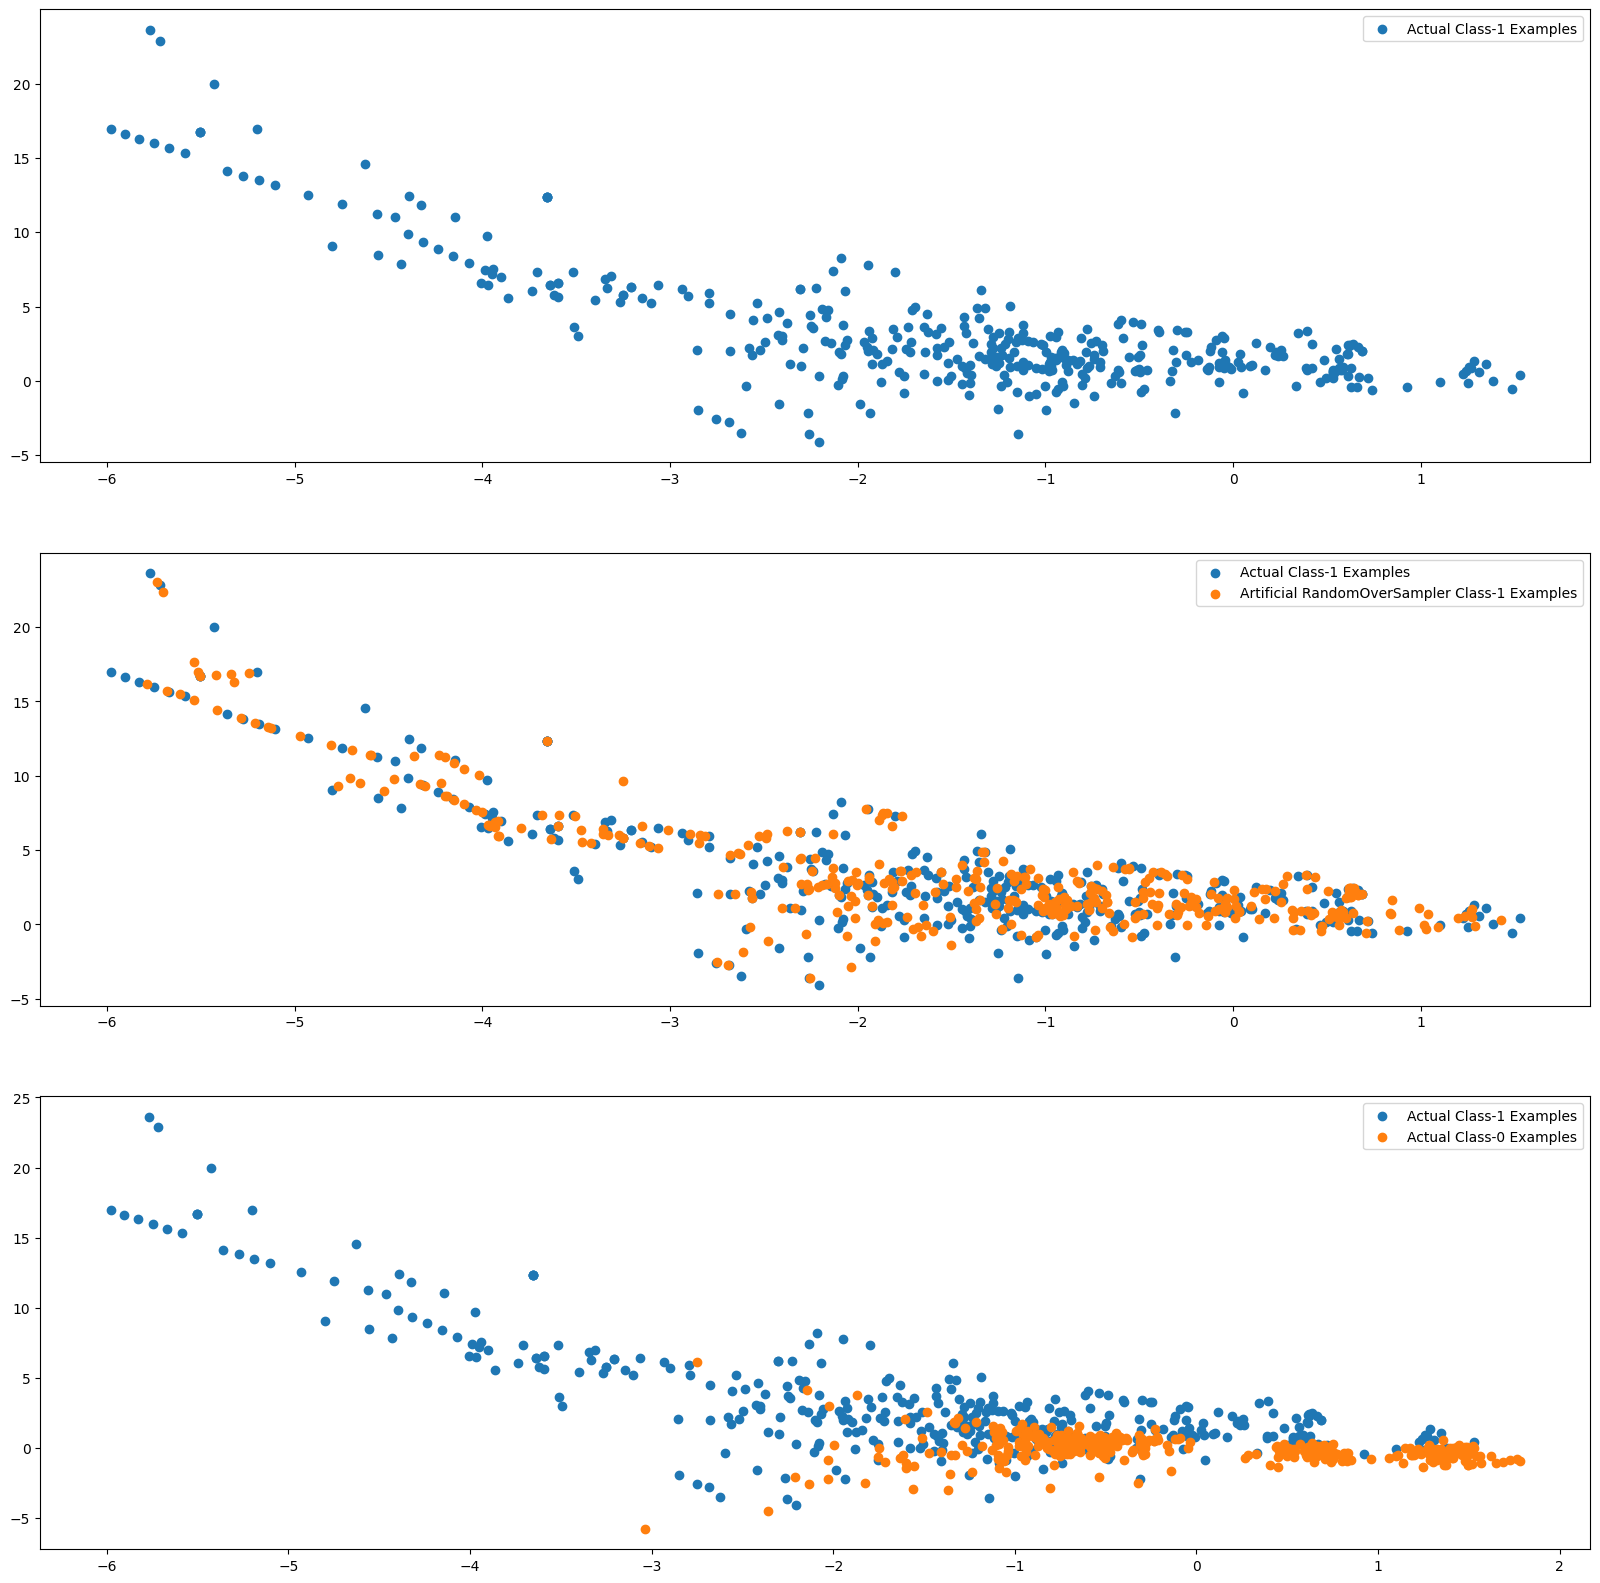

In [170]:
import warnings
warnings.filterwarnings("ignore")


X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

1. Logistic Regression¶


======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.7526659965515137 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.4719159603118896 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.367293357849121 seconds
ROC-AUC Score for val data = 0.9907335767823798
Mean precision val score: 0.9702187684974365
Mean recall val score: 0.9289517302627819
Mean f1 val score: 0.9491353412846303
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed:

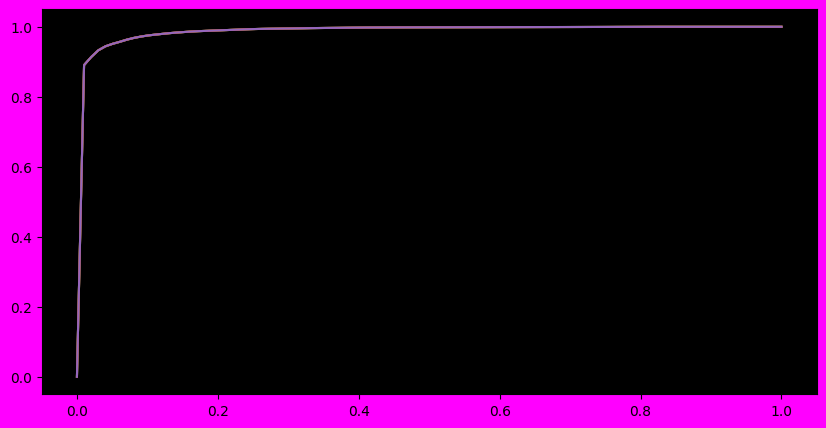

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time


print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='grey')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


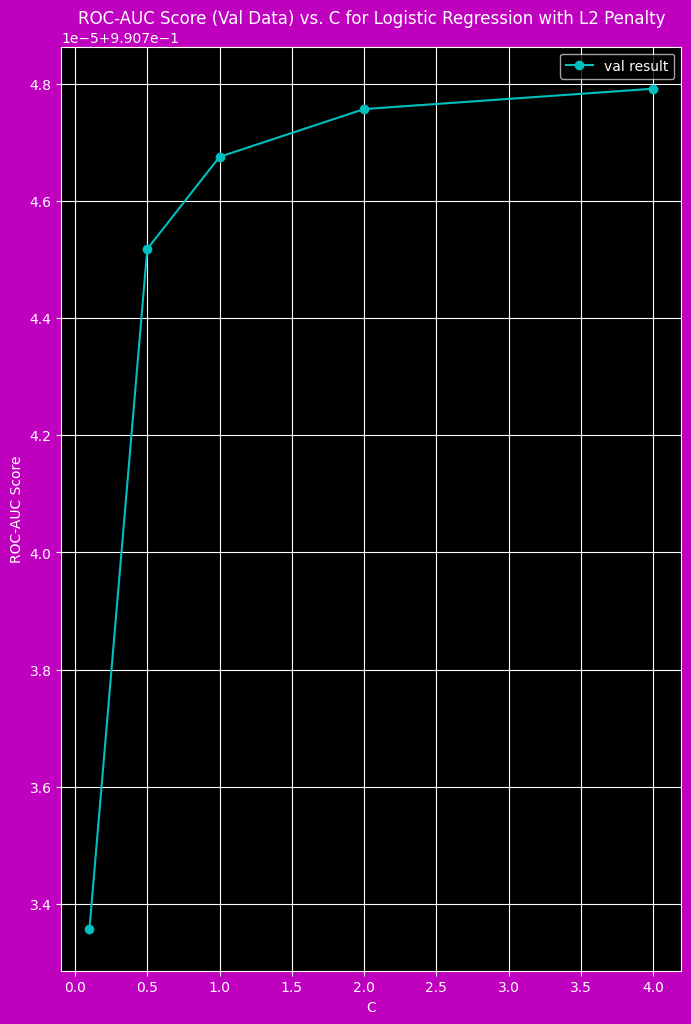

In [172]:

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

In [173]:

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])



Mean ROC-AUC scores for val data for all values of C: 
 [0.9907335767823798, 0.9907451785528639, 0.9907467507503931, 0.9907475659886256, 0.9907479135166498]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9907479135166498
Mean precision val score for best C 0.9700892879660502
Mean recall val score for best C 0.9292199198948344
Mean f1 val score for best C 0.9492131800549414


In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 20.52 seconds
Best ROC AUC score:  0.9907510842387103
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [175]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9906123995650367
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9907366388330706
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9907484461455339
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9907499645872683
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9907507539914054
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9907510842387103

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.00017340707398890868
{'

Random Forest

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier


print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='white')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))

In [ ]:
# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()


# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

In [ ]:
# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 6349.63 seconds
Best ROC AUC score:  0.9999982480945871
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [177]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9999982480945871

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 1.146497726345805e-06


 XGBoost

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 2.306533098220825 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.7285645008087158 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.615469217300415 seconds
ROC-AUC Score for val data = 0.9837994918694583
Mean precision val score: 0.9819022091638513
Mean recall val score: 0.8929923368110054
Mean f1 val score: 0.9353384607979223
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.7004284858703613 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938

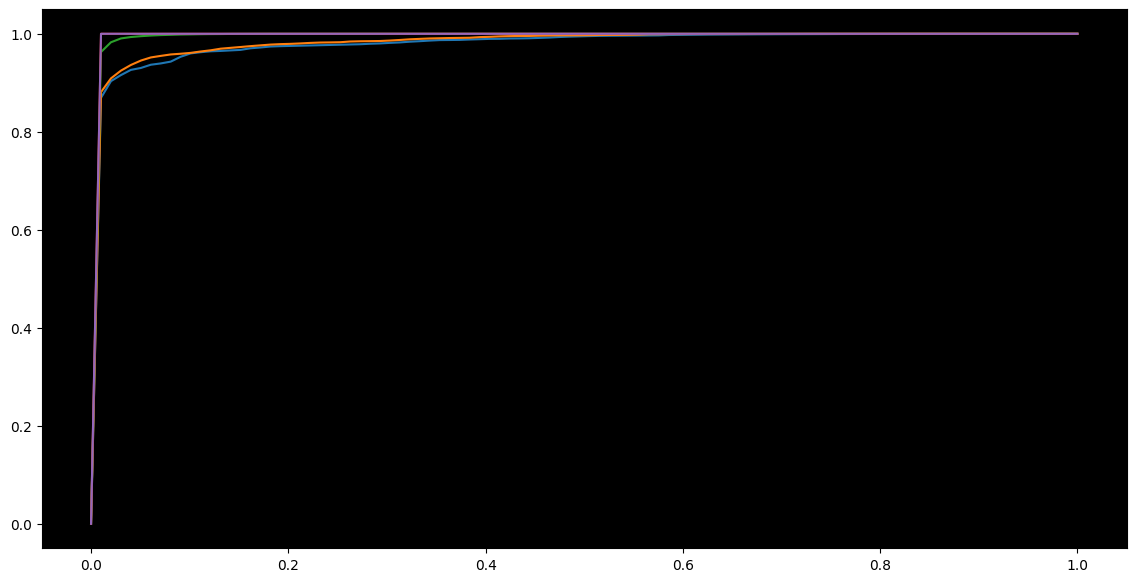

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb


print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='white')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42, eval_metric='logloss'
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

In [179]:

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])

Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9837994918694583, 0.9870648334939274, 0.9985566358297082, 0.9999472945597635, 0.9999728440163757]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.9999728440163757
Mean precision val score for best Learning Rate: 0.9987047103283059
Mean recall val score for best Learning Rate: 0.9999780172432744
Mean f1 val score for best Learning Rate: 0.9993409464772158


In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

In [ ]:
X_test_saved.head()

In [ ]:
y_test_saved.head()

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
# Define the RandomOverSampler
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using RandomOverSampler
X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [ ]:

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
precision = precision_score(y_test_saved_smote, y_pred)
recall = recall_score(y_test_saved_smote, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", precision)
print("LogisticRegression Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
precision = precision_score(y_test_saved_smote, y_pred)
recall = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", precision)
print("XGBOOST Classifier Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
precision = precision_score(y_test_saved_smote, y_pred)
recall = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", precision)
print("Random Forest Classifier Recall on Test Set =", recall)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))